# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv('used_device_data.csv')

In [3]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 3454 rows and 15 columns.


In [4]:
data.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [7]:
df.duplicated().sum() # to check duplicate values

0

In [8]:
df.isnull().sum() #to check missing values

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

### Statistical summary of the data

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


In [10]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

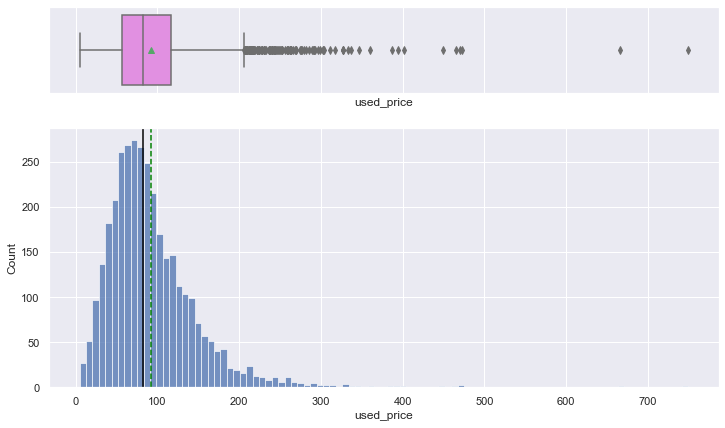

In [11]:
histogram_boxplot(df, "used_price")

In [12]:
df["used_price_log"] = np.log(df["used_price"])

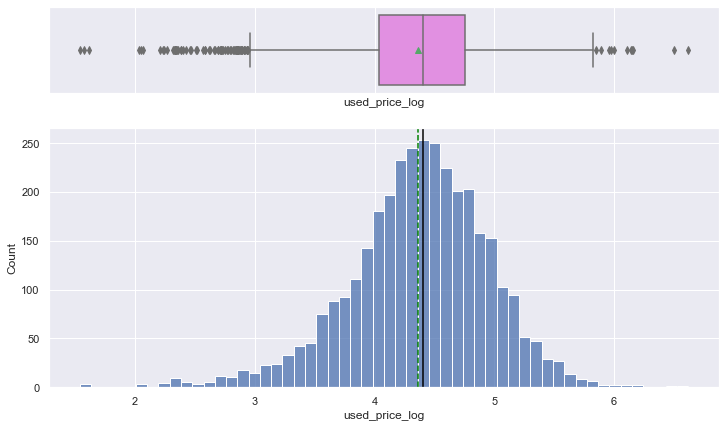

In [13]:
histogram_boxplot(df, "used_price_log")

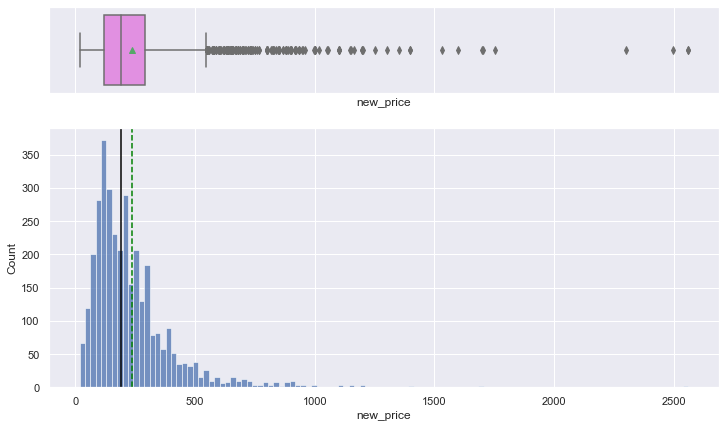

In [14]:
histogram_boxplot(df, "new_price")

In [15]:
df["new_price_log"] = np.log(df["new_price"])

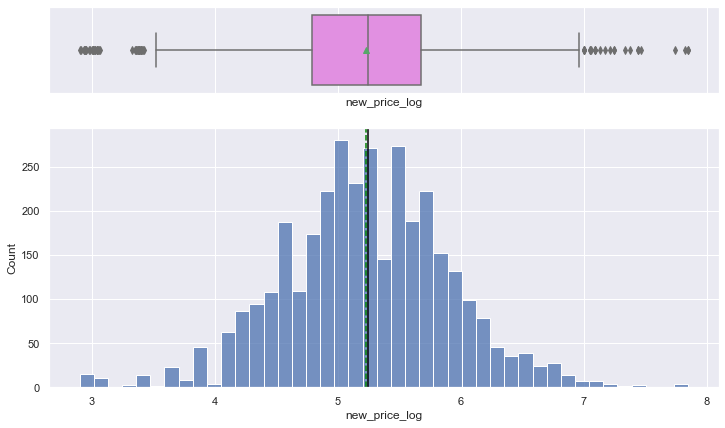

In [16]:
histogram_boxplot(df, "new_price_log")

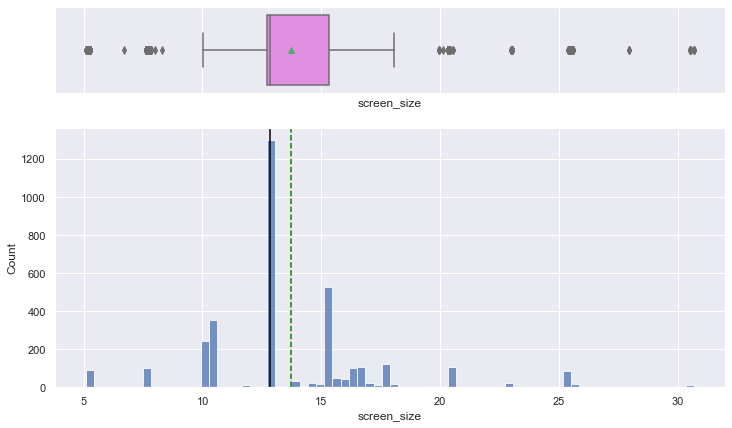

In [17]:
histogram_boxplot(df, "screen_size")

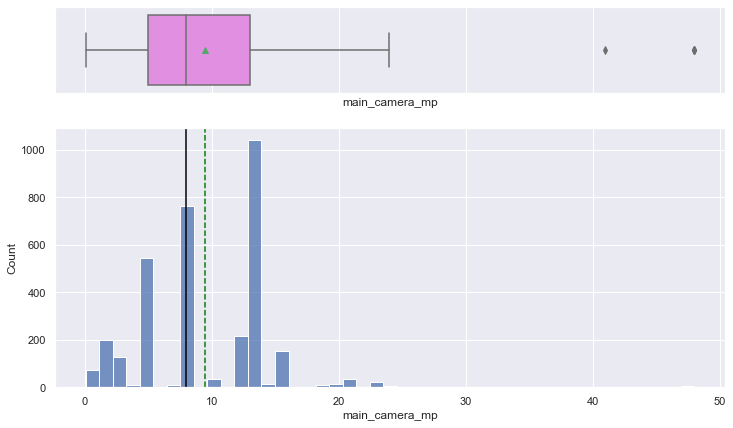

In [18]:
histogram_boxplot(df, "main_camera_mp")

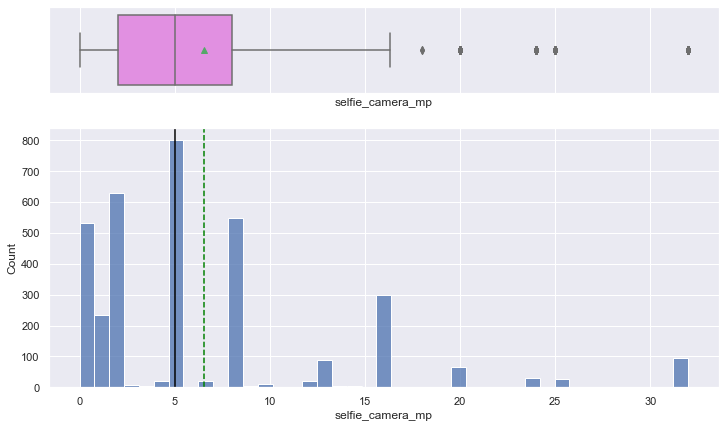

In [19]:
histogram_boxplot(df, "selfie_camera_mp")

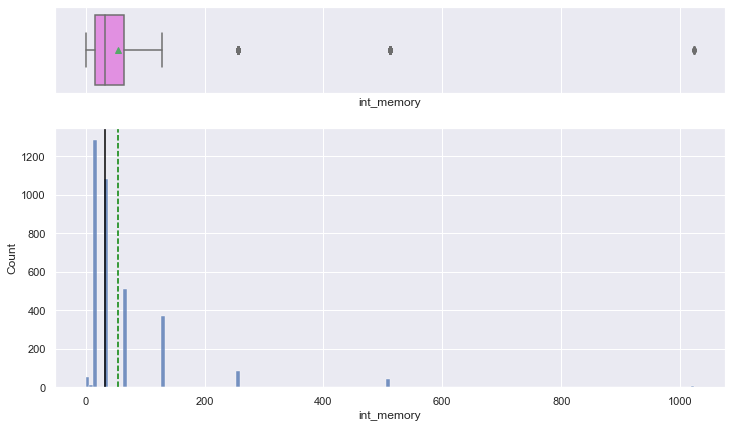

In [20]:
histogram_boxplot(df, "int_memory")

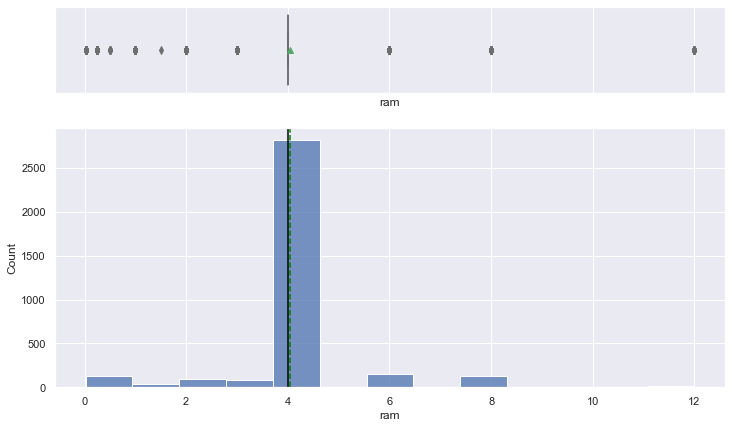

In [21]:
histogram_boxplot(df, "ram")

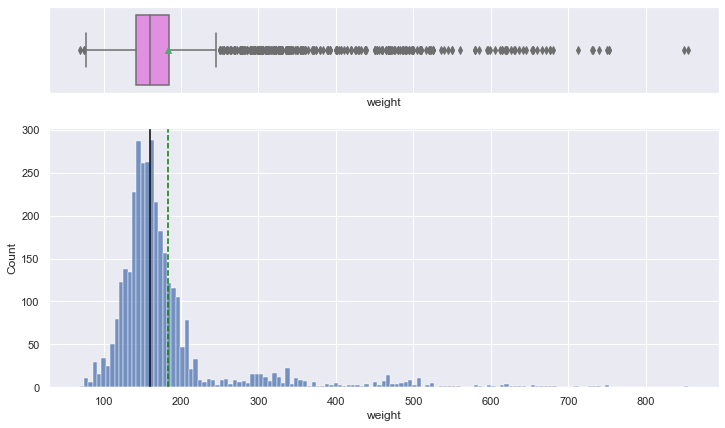

In [22]:
histogram_boxplot(df, "weight")

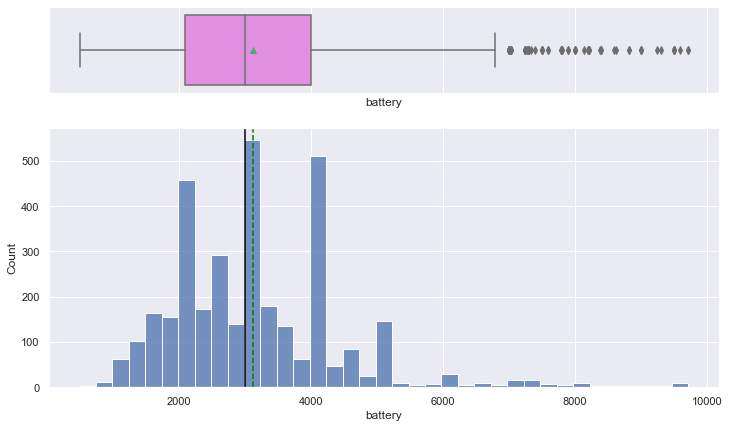

In [23]:
histogram_boxplot(df, "battery")

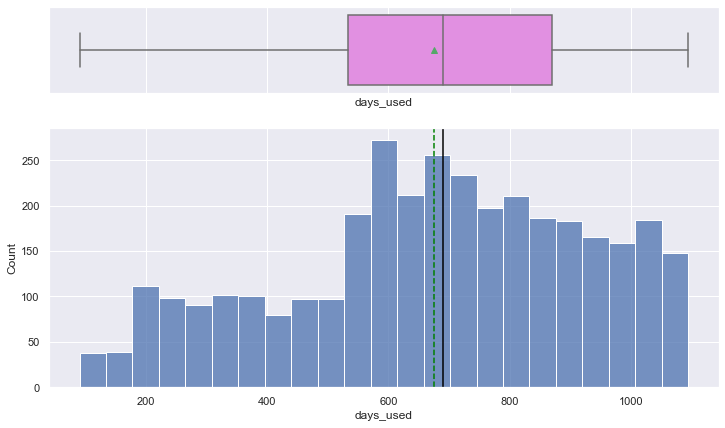

In [24]:
histogram_boxplot(df, "days_used")

In [25]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

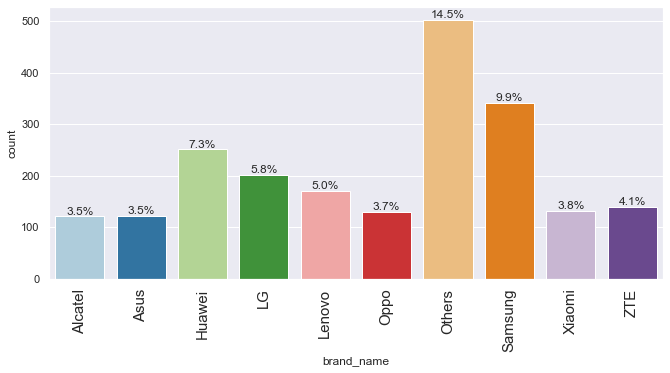

In [26]:
labeled_barplot(df, "brand_name", perc=True, n=10)

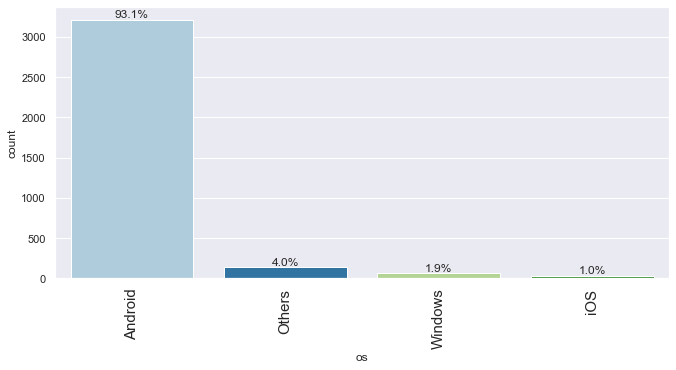

In [27]:
labeled_barplot(df, "os", perc=True, n=10)

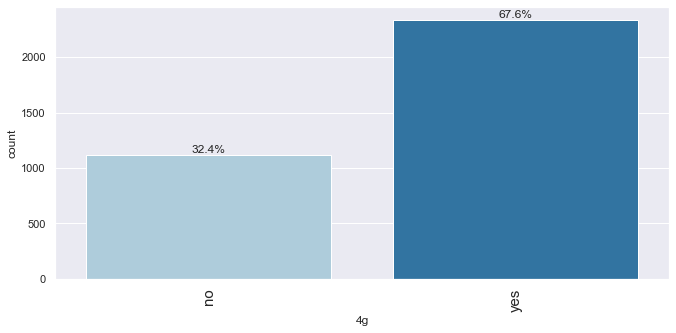

In [28]:
labeled_barplot(df, "4g", perc=True, n=10)

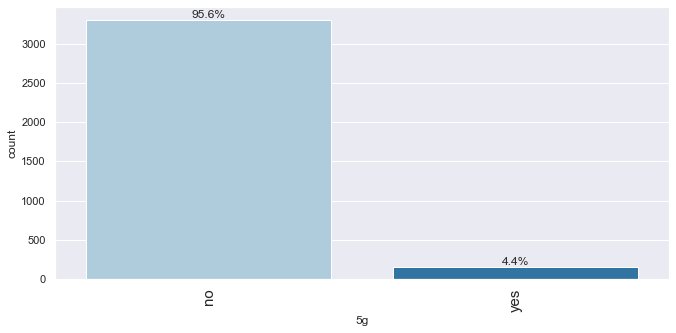

In [29]:
labeled_barplot(df, "5g", perc=True, n=10)

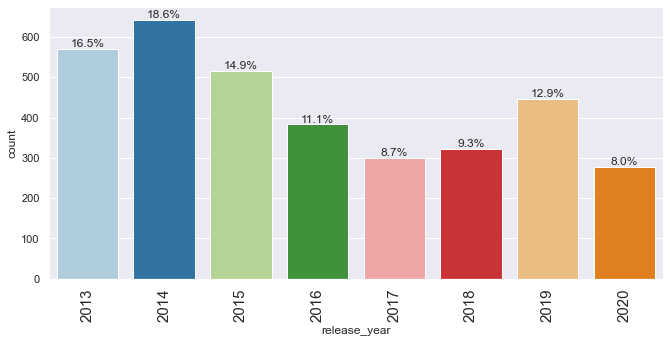

In [30]:
labeled_barplot(df, "release_year", perc=True, n=10)

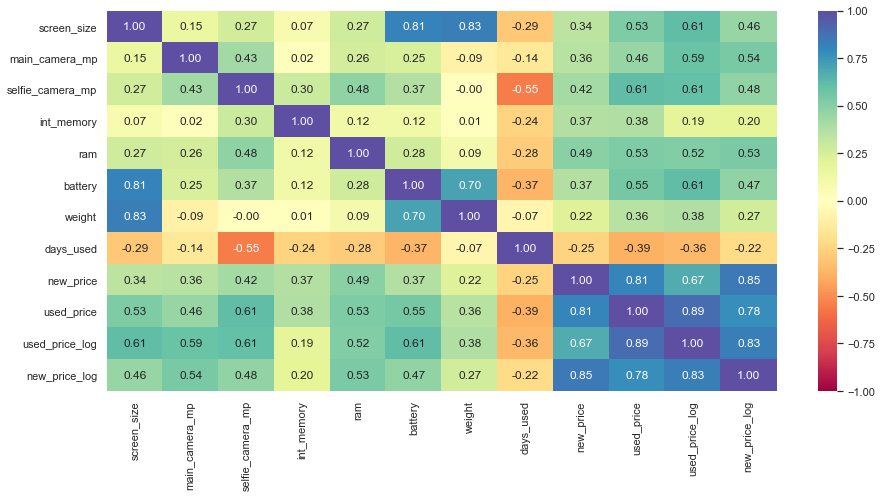

In [31]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

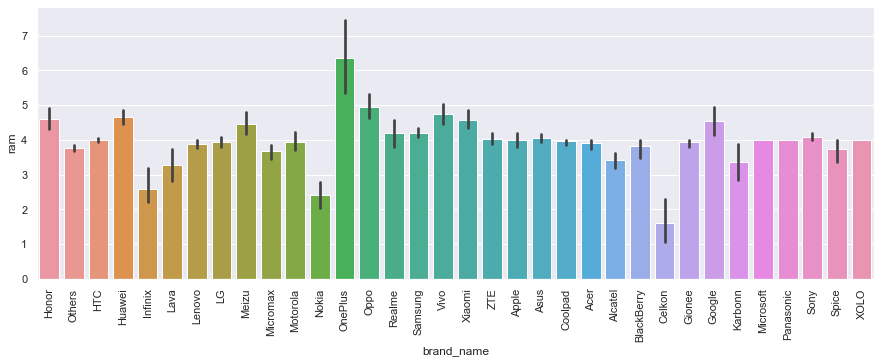

In [32]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases a device's weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [33]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 17)

In [34]:
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=True)

brand_name
Micromax     118.000000
Spice        158.000000
Panasonic    182.000000
Infinix      193.000000
Oppo         195.000000
ZTE          195.400000
Vivo         195.630769
Realme       196.833333
Motorola     200.757143
Gionee       209.430000
Xiaomi       231.500000
Honor        248.714286
Asus         313.772727
Nokia        318.000000
Acer         360.000000
LG           366.058333
Alcatel      380.000000
Others       390.546341
Huawei       394.486486
Samsung      398.352000
HTC          425.000000
Sony         439.500000
Apple        439.558824
Lenovo       442.721429
Google       517.000000
Name: weight, dtype: float64

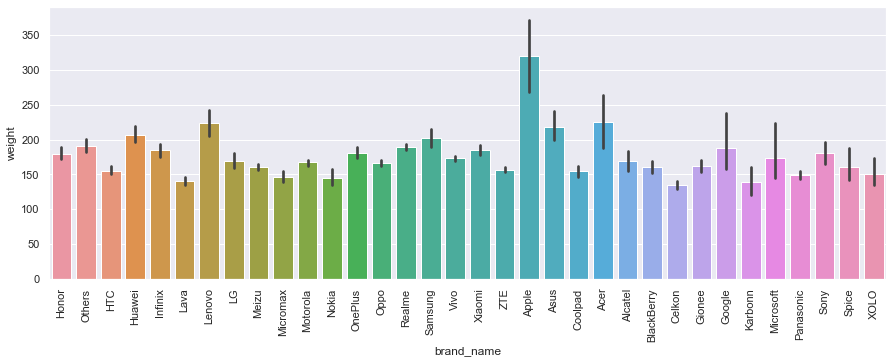

In [35]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

**People who buy devices primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [36]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 17)

In [37]:
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=True)

brand_name
Micromax     118.000000
Spice        158.000000
Panasonic    182.000000
Infinix      193.000000
Oppo         195.000000
ZTE          195.400000
Vivo         195.630769
Realme       196.833333
Motorola     200.757143
Gionee       209.430000
Xiaomi       231.500000
Honor        248.714286
Asus         313.772727
Nokia        318.000000
Acer         360.000000
LG           366.058333
Alcatel      380.000000
Others       390.546341
Huawei       394.486486
Samsung      398.352000
HTC          425.000000
Sony         439.500000
Apple        439.558824
Lenovo       442.721429
Google       517.000000
Name: weight, dtype: float64

In [38]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 17)

In [39]:
df_large_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
Meizu         17
ZTE           17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
XOLO           3
Gionee         3
Karbonn        2
Spice          2
Panasonic      2
Microsoft      1
Name: brand_name, dtype: int64

In [40]:
df_large_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
Meizu         17
ZTE           17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
XOLO           3
Gionee         3
Karbonn        2
Spice          2
Panasonic      2
Microsoft      1
Name: brand_name, dtype: int64

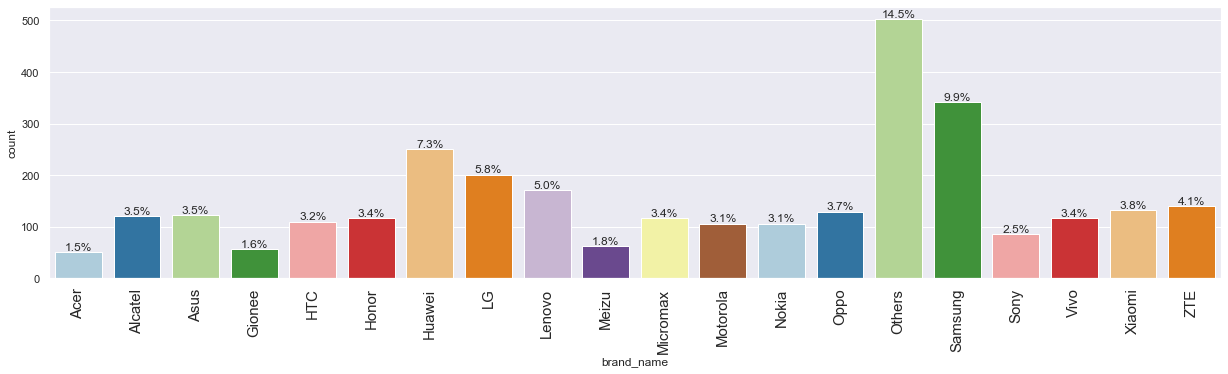

In [41]:
labeled_barplot(df, "brand_name", perc=True,n=20)

In [42]:
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350
          , np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)

df["device_category"].value_counts()

Budget        1844
Mid-ranger    1025
Premium        585
Name: device_category, dtype: int64

In [43]:
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty], labels=["Budget", "Mid-ranger", "Premium"]
)
df["device_category"]

0           Budget
1       Mid-ranger
2          Premium
3       Mid-ranger
4           Budget
           ...    
3449       Premium
3450       Premium
3451        Budget
3452        Budget
3453        Budget
Name: device_category, Length: 3454, dtype: category
Categories (3, object): ['Budget' < 'Mid-ranger' < 'Premium']

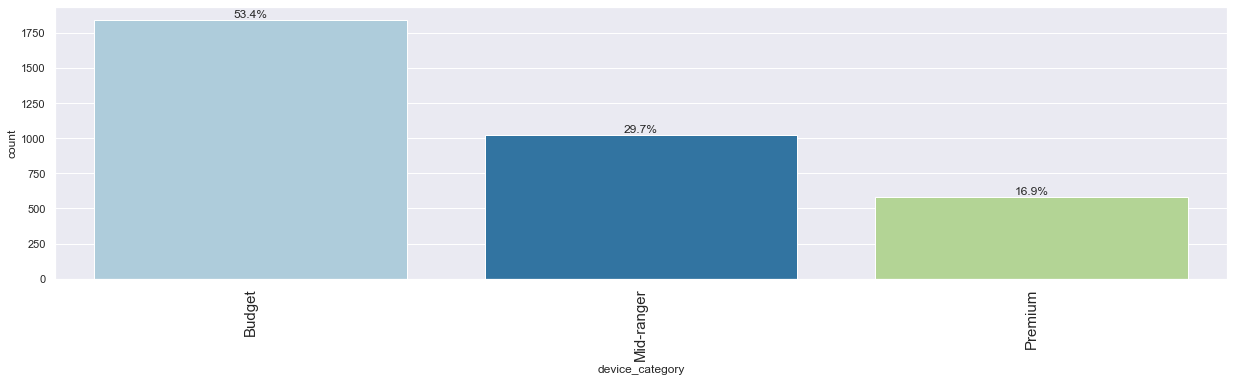

In [44]:
labeled_barplot(df, "device_category", perc=True,n=20)

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [45]:
df_selfie_camera = df[df.selfie_camera_mp>8] ## Complete the code to create a dataframe having selfie_camera_mp > 8
df_selfie_camera.shape

(655, 18)

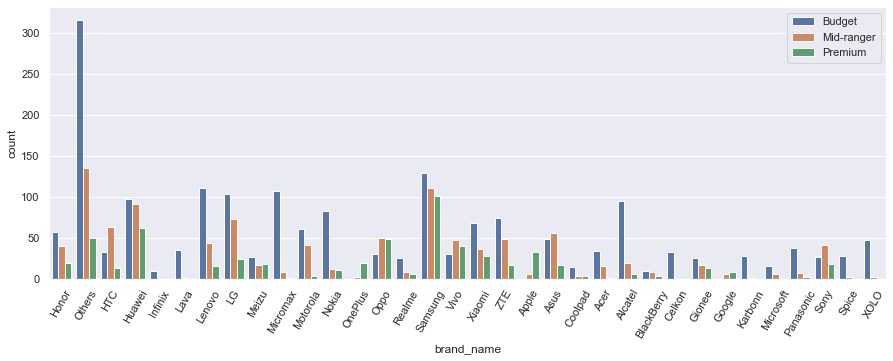

In [46]:
plt.figure(figsize=(15, 5))
sns.countplot(x='brand_name',data=df,hue='device_category') ## Complete the code to create countplot for 'brandname' with hue = 'device_category' on df_selfie_camera
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

In [47]:
df_main_camera = df[df.main_camera_mp>16] ## Complete the code to create a dataframe having main_camera_mp > 16
df_main_camera.shape

(94, 18)

<AxesSubplot:xlabel='device_category', ylabel='count'>

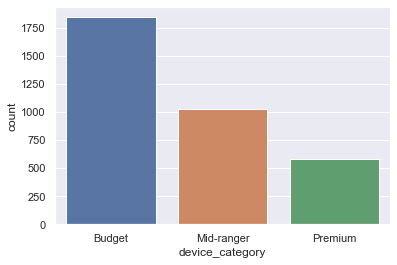

In [48]:
sns.countplot(x='device_category', data =df)

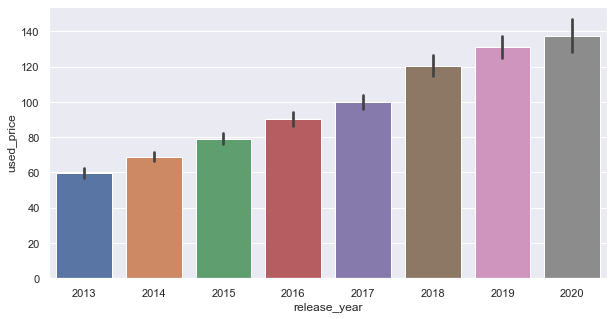

In [49]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="release_year", y="used_price") ## Complete the code tp create barplot for release year and used price
plt.show()

<AxesSubplot:xlabel='device_category', ylabel='4g'>

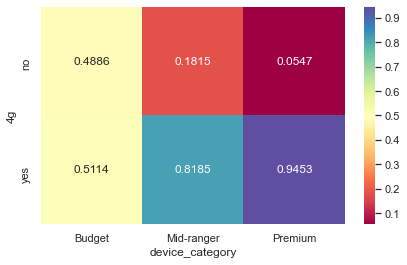

In [50]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

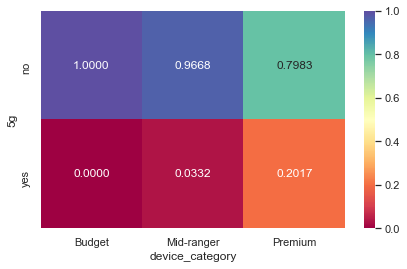

In [51]:
plt.figure(figsize=(15, 4))
plt.subplot(122)
sns.heatmap( pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral" ) ## Complete the code to create crosstab for 5g

plt.show()

In [52]:
df1=df.copy()

In [53]:
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
device_category       0
dtype: int64

In [54]:
cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

In [55]:
for col in cols_impute:
    df1[col] = df1.groupby('release_year')[col].transform(
        lambda x: x.fillna(x.median())
    )
df1[col]

0       146.0
1       213.0
2       213.0
3       480.0
4       185.0
        ...  
3449    190.0
3450    200.0
3451    165.0
3452    160.0
3453    168.0
Name: weight, Length: 3454, dtype: float64

In [56]:
for col in cols_impute:
    df1[col] =  df1.groupby('brand_name')['main_camera_mp'].transform(
        lambda x: x.fillna(x.median())
    )
df1[col]

0       13.0
1       13.0
2       13.0
3       13.0
4       13.0
        ... 
3449    12.2
3450    13.0
3451    13.0
3452    13.0
3453    13.0
Name: weight, Length: 3454, dtype: float64

In [57]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].mean())
df1["main_camera_mp"] 

0       13.0
1       13.0
2       13.0
3       13.0
4       13.0
        ... 
3449    12.2
3450    13.0
3451    13.0
3452    13.0
3453    13.0
Name: main_camera_mp, Length: 3454, dtype: float64

In [58]:
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")



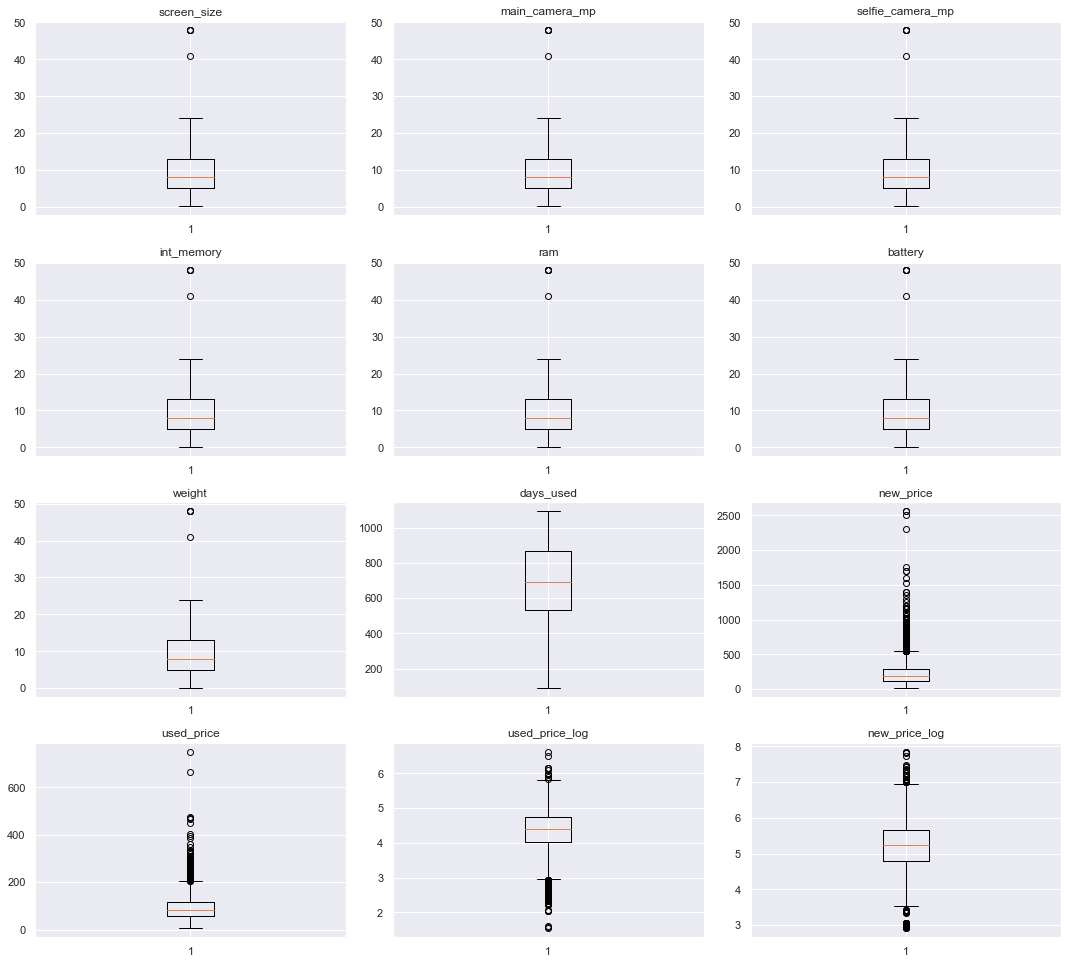

In [59]:
plt.figure(figsize=(15, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df1[numeric_columns[i]], whis=1.5)
    plt.tight_layout()
    plt.title(variable) ## Complete the code to create boxplots for all the columns
plt.show()

## Building a Linear Regression model

In [60]:
X = df1.drop(["used_price_log"], axis=1)
y = df1["used_price_log"]
print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android         13.0  yes   no            13.0   
1      Honor  Android         13.0  yes  yes            13.0   
2      Honor  Android         13.0  yes  yes            13.0   
3      Honor  Android         13.0  yes  yes            13.0   
4      Honor  Android         13.0  yes   no            13.0   

   selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
0              13.0        13.0  13.0     13.0    13.0          2020   
1              13.0        13.0  13.0     13.0    13.0          2020   
2              13.0        13.0  13.0     13.0    13.0          2020   
3              13.0        13.0  13.0     13.0    13.0          2020   
4              13.0        13.0  13.0     13.0    13.0          2020   

   days_used  new_price  used_price  new_price_log device_category  
0        127     111.62       74.26       4.715100          Budget  
1        325     249.39      174.53       5.

In [61]:
X = df1.drop(["used_price","new_price","used_price_log", "device_category"], axis=1)
y = df1["used_price_log"]
print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android         13.0  yes   no            13.0   
1      Honor  Android         13.0  yes  yes            13.0   
2      Honor  Android         13.0  yes  yes            13.0   
3      Honor  Android         13.0  yes  yes            13.0   
4      Honor  Android         13.0  yes   no            13.0   

   selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
0              13.0        13.0  13.0     13.0    13.0          2020   
1              13.0        13.0  13.0     13.0    13.0          2020   
2              13.0        13.0  13.0     13.0    13.0          2020   
3              13.0        13.0  13.0     13.0    13.0          2020   
4              13.0        13.0  13.0     13.0    13.0          2020   

   days_used  new_price_log  
0        127       4.715100  
1        325       5.519018  
2        162       5.884631  
3        345       5.630961  
4        293       4.947837  

0

In [62]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,2020.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,13.0,13.0,13.0,13.0,13.0,13.0,13.0,2020.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,13.0,13.0,13.0,13.0,13.0,13.0,2020.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,13.0,13.0,13.0,13.0,13.0,13.0,13.0,2020.0,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,13.0,13.0,13.0,13.0,13.0,13.0,13.0,2020.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [64]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [65]:
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test) ## Complete the code to add contant to the test data

olsmodel1 = sm.OLS(y_train, x_train)
olsres=olsmodel1.fit()
print(olsres.summary())## Complete the code to fit OLS 


                                 OLS Regression Results                                
Dep. Variable:         used_price_log   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.408e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                        0.00
Time:                        08:01:45   Log-Likelihood:                         -341.41
No. Observations:                2417   AIC:                                      766.8
Df Residuals:                    2375   BIC:                                      1010.
Df Model:                          42                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### Interpretation of R-squared

* The R-squared value tells us that our model can explain 99.6% of the variance in the training set.

## Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

## Model performance evaluation

In [66]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [67]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsres, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.278682,0.217828,0.772044,0.767423,5.214801


In [68]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsres, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.284445,0.220124,0.775676,0.764778,5.370593


**Observations**

- The training $R^2$ is 0.77, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict used price log within a mean error of 2.8 on the test data.

- MAPE of 5.3 on the test data means that we are able to predict within 5.3% of the used price log.

**Let's check the model performance.**

* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE and MAE.
* We will define a function to calculate MAPE.

In [69]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse, "MAE": mae, "MAPE": mape,}, index=[0],)

    return df_perf

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsres, x_train, y_train) ## Complete the code to check the performance on train data
olsmodel1_train_perf

Training Performance



,RMSE,MAE,MAPE
0,28.302764,19.389839,22.876844


In [71]:
# checking model performance on train set (seen 30% data)
print("Testing Performance\n")
olsmodel1_train_perf = model_performance_regression(olsres, x_test, y_test) ## Complete the code to check the performance on train data
olsmodel1_train_perf

Testing Performance



,RMSE,MAE,MAPE
0,27.263424,19.243406,23.565347


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [74]:
checking_vif(x_train)

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,screen_size,inf
1,main_camera_mp,inf
2,selfie_camera_mp,inf
3,int_memory,inf
4,ram,inf
5,battery,inf
6,weight,inf
7,release_year,196.003866
8,days_used,12.203023
9,new_price_log,133.488249


### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [99]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [100]:
col_list=['brand_name_Samsung', 'brand_name_Others','brand_name_Huawei','brand_name_Apple','new_price_log', 'release_year','os_iOS', 'brand_name_LG', '4g_yes']
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.995932,0.281079
1,brand_name_Others,0.995929,0.281167
2,brand_name_Samsung,0.995927,0.281250
3,brand_name_LG,0.995923,0.281394
4,brand_name_Apple,0.995919,0.281501
5,os_iOS,0.995913,0.281727
6,4g_yes,0.995868,0.283278
7,release_year,0.995401,0.298834
8,new_price_log,0.992321,0.386155


* Dropping `New price log` would have the maximum impact on the predictive power of the model (amongst the variables being considered).

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [101]:
# initial list of columns
cols = x_train.columns.tolist()   ## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux =  x_train[cols]   ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'new_price_log', 'brand_name_Apple', 'brand_name_BlackBerry', 'brand_name_HTC', 'brand_name_LG', 'brand_name_Lenovo', 'brand_name_Micromax', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others', 'os_iOS', '4g_yes']


In [102]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [103]:
olsmodel2 = sm.OLS(y_train, x_train2).fit() ## Complete the code fit OLS() on y_train and x_train2
print(olsmodel2.summary())

                                 OLS Regression Results                                
Dep. Variable:         used_price_log   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.274e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                        0.00
Time:                        09:29:30   Log-Likelihood:                         -357.82
No. Observations:                2417   AIC:                                      751.6
Df Residuals:                    2399   BIC:                                      855.9
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [104]:
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,MAPE
0,28.587799,19.553739,23.061409


In [105]:
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,MAPE
0,27.475657,19.405485,23.847078


**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.

In [106]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train ## Complete the code to store the actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.999726,0.087762
1525,4.448399,4.704022,-0.255623
1128,4.315353,4.298905,0.016448
3003,4.282068,4.353902,-0.071834
2907,4.456438,4.358758,0.097680


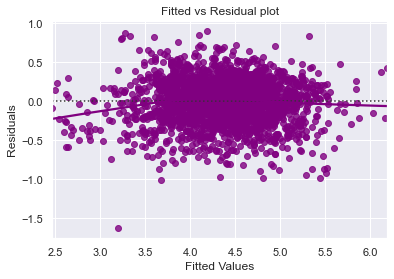

In [107]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.

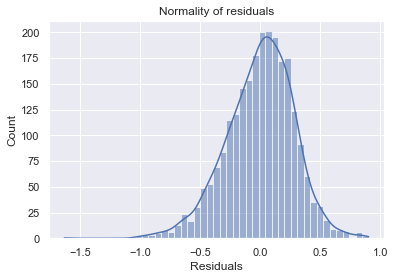

In [108]:
sns.histplot(data=df_pred, x="Residuals", kde=True) ## Complete the code to test the normality
plt.title("Normality of residuals")
plt.show()

**Observations**

- The histogram of residuals has a bell shape structure.
- Let's check the Q-Q plot.

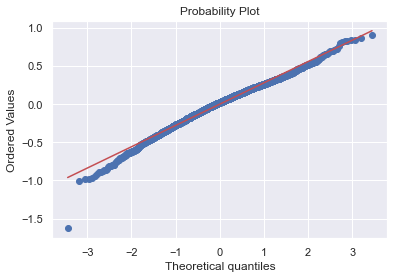

In [109]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

**Observations**

- The residuals almost follow a straight line.
- Let's check the results of the Shapiro-Wilk test.

In [110]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9892988801002502, pvalue=1.8470799976327834e-12)

**Observations**

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- However, based on the distribution plot and Q-Q plot, we can consider the distribution to be a good approximation of the normal distribution.
- So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [111]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2) ## Complete the code to check homoscedasticity
lzip(name, test)

[('F statistic', 0.940287064523497), ('p-value', 0.8559015781504643)]

**Observations**

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

## Final Model Summary

In [112]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                                 OLS Regression Results                                
Dep. Variable:         used_price_log   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.274e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                        0.00
Time:                        09:29:42   Log-Likelihood:                         -357.82
No. Observations:                2417   AIC:                                      751.6
Df Residuals:                    2399   BIC:                                      855.9
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [113]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,MAPE
0,28.587799,19.553739,23.061409


In [114]:
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel2, x_test2, y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,MAPE
0,27.475657,19.405485,23.847078


## Actionable Insights and Recommendations

- 

- A unit increase in (`os_IOS`) decreases the price by 0.57 units, all other variables held constant.
- A unit increase in main_camera_mp increases the  price by 0.0020 units, all other variables held constant.
- A unit increase in a selfie_camera_mp  increases the price by 0.0020 units, all other variables held constant.
- A unit increase in index of accessibility to 4g_yes  increases the  price by 0.1157 units, all other variables held constant.
